This notebook is the result of my volunteer work for the DataDive Event hosted by DataKind that happened on 18 September 2021. I conduct data exploration to support the Delores Barr Weaver Policy Center's (DBWPC) mission of championing young women, especially those in the justice system, in Florida. 

Did you know that a lot of young black girls are pushed towards the juvenile system from a school setting and that black girls are overrepresented in terms of arrest in almost 90% of all counties in Florida? I was shocked to learn these facts and wanted to help DBQPC better understand the socio-economic and school factors that relate to these phenomena so they can better focus their advocacy and training efforts. 

Data Sources:
* The arrest and commitment data (Arrest and commitment for Black girls, 2018-19.xlsx) for Black Girls was supplied by the DBWPC partners at the event.
* Poverty data (PovertyReport.xlsx) was retrieved from the Economic Research Service, U.S. Department of Agriculture (HERE: https://data.ers.usda.gov/reports.aspx?ID=17826)
* All school-related data was sourced from the Florida Department of Education (HERE: https://www.fldoe.org/accountability/data-sys/edu-info-accountability-services/pk-12-public-school-data-pubs-reports/archive.stml)


## Setting up Analysis 

In [1]:
# import modules
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import stats

## Preparing Data

Clean and Prep data to analyze the following data:
* Arrest of Black Girls
* All People in Poverty Index
* Children in Poverty Index
* Absence Data
* Student Population Data
* Teacher Salary Data
* Drop out Rates
* Staff Data

In [2]:
# import data
ac_data = pd.read_excel('Arrest and commitment for Black girls, 2018-19.xlsx')
teacher_data = pd.read_excel('1819TeacherSalaryData.xlsx')
poverty_data = pd.read_excel('PovertyReport.xlsx')
absence_data = pd.read_excel('1819ABS21Days10Comparison.xlsx')
staff_data = pd.read_excel('1819InstructionalSalaries.xlsx')
dropout_data = pd.DataFrame(pd.read_excel('Dropout Data 2018-19.xlsx'))
pop_data = pd.DataFrame(pd.read_excel('1819MembInFLPublicSchools.xlsx'))

In [3]:
# fix typo in column
ac_data.rename(columns = {'Arrest(Blakc)':'% Arrested are Black Girls'}, inplace = True)
ac_data.rename(columns={'County':'Name'}, inplace = True)
ac_data.drop(ac_data.tail(3).index,inplace=True)
ac_data


,Name,% of Black girls in General Population,Arrest(N),% Arrested are Black Girls,Commitment(N),Commitment(Black)
0,Alachua,0.341779,137.0,0.744526,12.0,0.92
1,Baker,0.130720,24.0,0.375000,1.0,0.00
2,Bay,0.130961,124.0,0.362903,3.0,1.00
3,Bradford,0.227002,17.0,0.588235,1.0,0.00
4,Brevard,0.148395,194.0,0.381443,11.0,0.36
...,...,...,...,...,...,...
62,Union,0.124410,7.0,0.428571,0.0,NaN
63,Volusia,0.162607,369.0,0.392954,11.0,0.45
64,Wakulla,0.102233,6.0,0.333333,0.0,NaN
65,Walton,0.056216,60.0,0.083333,0.0,NaN


In [4]:
# define function to format the excel function into that is suitable for analysis
def get_df(df):
    headers = df.loc[1]
    new_df = pd.DataFrame(df.values[3:], columns = headers)
    return new_df

In [5]:
## Poverty data 

poverty_df = get_df(poverty_data)

# deal with columns with the same name (bc of importing from excel)
cols=pd.Series(poverty_df.columns)

for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]

# rename the columns with the cols list.
poverty_df.columns=cols
poverty_df.rename(columns = {'Percent':'% of All People in Poverty', 'Percent.1':'% of Children in Poverty'}, inplace = True)
# Only keep relevant columns
poverty_df = poverty_df[['Name','% of All People in Poverty', '% of Children in Poverty']]
# drop last four rows not contaning any data
poverty_df.drop(index=[67,68,69,70], inplace = True)

poverty_df

1,Name,% of All People in Poverty,% of Children in Poverty
0,Alachua,18.4,17.7
1,Baker,14.9,21
2,Bay,12.1,18.2
3,Bradford,21,27.2
4,Brevard,9.4,12.7
...,...,...,...
62,Union,19.9,20.2
63,Volusia,13.1,20
64,Wakulla,12,16.6
65,Walton,10.8,17.6


In [6]:
## Absence data

absence_df = get_df(absence_data)
# rename 'District Name' to 'Name' for ease of merging tables
absence_df.rename(columns = {'District Name':'Name'},inplace = True)
# drop rows with no data
absence_df.drop(absence_df.tail(6).index,inplace=True)
# keep only columns that uses percentages
absence_df = absence_df[['Name','% of Students Absent 21 or More Days', '% of Students Absent 10% or More']]
absence_df

1,Name,% of Students Absent 21 or More Days,% of Students Absent 10% or More
0,ALACHUA,0.116217,0.203178
1,BAKER,0.126879,0.22517
2,BAY,0.139134,0.296175
3,BRADFORD,0.218476,0.361119
4,BREVARD,0.072107,0.149173
...,...,...,...
62,UNION,0.122449,0.218494
63,VOLUSIA,0.101793,0.185261
64,WAKULLA,0.181689,0.288589
65,WALTON,0.102839,0.206884


In [7]:
## Teacher data

teacher_df = get_df(teacher_data)
# drop the rows for which we don't have arrest data (namely, DEAF/BLIND, FL VIRTUAL, FAU LAB SCHOH, FSU LAB SCH, FAMU ...
teacher_df.drop(index = [67,68,69,70,71,72], columns = 'District #', inplace = True)
teacher_df.rename(columns={'Median Salary':'Median Teacher Salary'}, inplace = True)
teacher_df

1,District Name,Number of Teachers,Median Teacher Salary
0,ALACHUA,1477,43081.17
1,BAKER,295,41463.81
2,BAY,1767,41028.64
3,BRADFORD,239,39170
4,BREVARD,4709,43956.96
...,...,...,...
62,UNION,165,38050
63,VOLUSIA,4063,43542
64,WAKULLA,316,39438
65,WALTON,623,43183.86


In [8]:
## Drop out rates 

# adding the data directly to the main df
ac_data['Dropout Rate'] = dropout_data['Cohort-Based Dropout Rates ']

# note: Couldn't find the drop out rates for indiviudal school years so the cohort-based drop out rates will need 
# function as an estimate for the former - take these results with a grain of salt.

In [9]:
# Staff Data

# Staff Data
staff_df = get_df(staff_data)

# deal with columns with the same name (bc of importing from excel)
# rename columns to distinguish between columns with the same name
cols=pd.Series(staff_df.columns)

for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + '.' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]

# rename the columns with the cols list.

new_cols = ['DIST #','DISTRICT NAME','GUIDANCE','Number Employed (Guidance)', 0, 'LIBRARIAN/MEDIA SPECIALIST','Number Employed (Librarian/Media Specialist)', 1,'SCHOOL PSYCHOLOGIST','Number Employed (School Psychologist)', \
            2, ' SOCIAL WORKER ','Number Employed (Social Worker)', 3,'INSTRUCTIONAL STAFF', 'Number Employed (Instructional Staff)', 4]
staff_df.columns = new_cols
staff_df.drop(staff_df.tail(6).index,inplace=True)
staff_df.drop(index=0, inplace = True)
staff_df.reset_index(inplace = True)

staff_df


,index,DIST #,DISTRICT NAME,GUIDANCE,Number Employed (Guidance),0,LIBRARIAN/MEDIA SPECIALIST,Number Employed (Librarian/Media Specialist),1,SCHOOL PSYCHOLOGIST,Number Employed (School Psychologist),2,SOCIAL WORKER,Number Employed (Social Worker),3,INSTRUCTIONAL STAFF,Number Employed (Instructional Staff),4
0,1,1,ALACHUA,47862,57,10,50693,42,10,NaN,NaN,NaN,24242,3,10,45215,1697,10
1,2,2,BAKER,46021,10,10,51919,6,10,60487,2,11,NaN,NaN,NaN,44272,329,10
2,3,3,BAY,47649,68,10,47725,30,10,57521,7,10,45785,10,10,44995,2010,10
3,4,4,BRADFORD,51450,9,10,51200,4,10,63490,1,11,NaN,NaN,NaN,42089,271,10
4,5,5,BREVARD,48002,182,10,49421,84,10,62064,36,11,44056,34,10,46804,5420,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,63,63,UNION,43824,5,10,40716,3,10,NaN,NaN,NaN,44889,1,10,40508,183,10
63,64,64,VOLUSIA,49639,136,10,51415,66,10,56010,26,11,54012,16,11,47141,4681,10
64,65,65,WAKULLA,46592,2,10,44036,8,10,NaN,NaN,NaN,43707,2,10,41577,353,10
65,66,66,WALTON,51039,19,10,56446,12,10,48193,3,10,NaN,NaN,NaN,47083,715,10


In [10]:
## population data

pop_df = get_df(pop_data)

new_cols = ['District #', 'District','Total Membership','White',0,'Black Students Enrolled','Black or African American Enrollment (%)',  \
            'Hispanic/Latino', 1,'Asian', 2,'Native Hawaiian or Other Pacific Islander',3, \
            'American Indian or Alaska Native',4,'Two or More Races',5]

pop_df.columns = new_cols

pop_df.drop(pop_df.tail(6).index, inplace = True)
pop_df.drop(index=0, inplace = True)
pop_df.reset_index(inplace = True)
pop_df

,index,District #,District,Total Membership,White,0,Black Students Enrolled,Black or African American Enrollment (%),Hispanic/Latino,1,Asian,2,Native Hawaiian or Other Pacific Islander,3,American Indian or Alaska Native,4,Two or More Races,5
0,1,01,ALACHUA,29845,12718,0.426135,10204,0.3419,3215,0.107723,1523,0.05103,32,0.001072,52,0.001742,2101,0.070397
1,2,02,BAKER,5060,4106,0.811462,645,0.12747,108,0.021344,34,0.006719,**,**.*,**,**.*,155,0.030632
2,3,03,BAY,28129,18660,0.663372,4330,0.153934,2438,0.086672,538,0.019126,67,0.002382,104,0.003697,1992,0.070817
3,4,04,BRADFORD,3165,2238,0.707109,716,0.226224,76,0.024013,22,0.006951,10,0.00316,**,**.*,94,0.0297
4,5,05,BREVARD,73734,44374,0.601812,10866,0.147368,10953,0.148547,1617,0.02193,106,0.001438,165,0.002238,5653,0.076667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,63,63,UNION,2356,1867,0.792445,297,0.126061,87,0.036927,**,**.*,**,**.*,**,**.*,95,0.040323
63,64,64,VOLUSIA,63249,36158,0.571677,10179,0.160935,12673,0.200367,1259,0.019905,117,0.00185,150,0.002372,2713,0.042894
64,65,65,WAKULLA,5059,4061,0.802728,503,0.099427,169,0.033406,30,0.00593,**,**.*,**,**.*,287,0.056731
65,66,66,WALTON,9826,7362,0.749237,530,0.053939,1320,0.134337,114,0.011602,**,**.*,34,0.00346,459,0.046713


In [11]:
## Join data to the main arrest and commitment table

ac_data['% of All People in Poverty'] = poverty_df['% of All People in Poverty'].astype('float64')
ac_data['% of Children in Poverty'] = poverty_df['% of Children in Poverty'].astype('float64')
ac_data['% of Students Absent 21 or More Days'] = absence_df['% of Students Absent 21 or More Days'].astype('float64')
ac_data['% of Students Absent 10% or More'] = absence_df['% of Students Absent 10% or More'].astype('float64')
ac_data['Number of Teachers'] = teacher_df['Number of Teachers'].astype('float64')
ac_data['Median Teacher Salary'] = teacher_df['Median Teacher Salary'].astype('float64')
ac_data['Number Employed (Guidance)'] = staff_df['Number Employed (Guidance)'].astype('float64')
ac_data['Number Employed (Librarian/Media Specialist)'] = staff_df['Number Employed (Librarian/Media Specialist)'].astype('float64')
ac_data['Number Employed (School Psychologist)'] = staff_df['Number Employed (School Psychologist)'].astype('float64')
ac_data['Number Employed (Social Worker)']= staff_df['Number Employed (Social Worker)'].astype('float64')
ac_data['Number Employed (Instructional Staff)'] = staff_df['Number Employed (Instructional Staff)'].astype('float64')
ac_data['Total Enrollment'] = pop_df['Total Membership'].astype('float64')
ac_data['Black Students Enrolled'] = pop_df['Black Students Enrolled'].astype('float64')
ac_data['Black or African American Enrollment (%)'] = pop_df['Black or African American Enrollment (%)'].astype('float64')
ac_data

,Name,% of Black girls in General Population,Arrest(N),% Arrested are Black Girls,Commitment(N),Commitment(Black),Dropout Rate,% of All People in Poverty,% of Children in Poverty,% of Students Absent 21 or More Days,...,Number of Teachers,Median Teacher Salary,Number Employed (Guidance),Number Employed (Librarian/Media Specialist),Number Employed (School Psychologist),Number Employed (Social Worker),Number Employed (Instructional Staff),Total Enrollment,Black Students Enrolled,Black or African American Enrollment (%)
0,Alachua,0.341779,137.0,0.744526,12.0,0.92,0.016,18.4,17.7,0.116217,...,1477.0,43081.17,57.0,42.0,NaN,3.0,1697.0,29845.0,10204.0,0.341900
1,Baker,0.130720,24.0,0.375000,1.0,0.00,0.024,14.9,21.0,0.126879,...,295.0,41463.81,10.0,6.0,2.0,NaN,329.0,5060.0,645.0,0.127470
2,Bay,0.130961,124.0,0.362903,3.0,1.00,0.046,12.1,18.2,0.139134,...,1767.0,41028.64,68.0,30.0,7.0,10.0,2010.0,28129.0,4330.0,0.153934
3,Bradford,0.227002,17.0,0.588235,1.0,0.00,0.034,21.0,27.2,0.218476,...,239.0,39170.00,9.0,4.0,1.0,NaN,271.0,3165.0,716.0,0.226224
4,Brevard,0.148395,194.0,0.381443,11.0,0.36,0.020,9.4,12.7,0.072107,...,4709.0,43956.96,182.0,84.0,36.0,34.0,5420.0,73734.0,10866.0,0.147368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Union,0.124410,7.0,0.428571,0.0,NaN,0.048,19.9,20.2,0.122449,...,165.0,38050.00,5.0,3.0,NaN,1.0,183.0,2356.0,297.0,0.126061
63,Volusia,0.162607,369.0,0.392954,11.0,0.45,0.025,13.1,20.0,0.101793,...,4063.0,43542.00,136.0,66.0,26.0,16.0,4681.0,63249.0,10179.0,0.160935
64,Wakulla,0.102233,6.0,0.333333,0.0,NaN,0.000,12.0,16.6,0.181689,...,316.0,39438.00,2.0,8.0,NaN,2.0,353.0,5059.0,503.0,0.099427
65,Walton,0.056216,60.0,0.083333,0.0,NaN,0.039,10.8,17.6,0.102839,...,623.0,43183.86,19.0,12.0,3.0,NaN,715.0,9826.0,530.0,0.053939


## Create Features

Along with the % of juvenile arrests that were black girls, we are interested in the overrepresentation of black girls in terms of arrest so we should create a feature with this in focus. According to one of the DBWPC representatives, Vannessa, "Because the counts for arrest will be higher, anything over 1.5 of the proportion of the general population in that county would be overrepresented."

In [12]:
# function to evaulate where black girls are overrepresented in that county
def is_overrepresented(val):
    if val > 1.5:
        return True
    else:
        return False

In [13]:
ac_data['Black Girls/Gen Pop (Arrest)'] = ac_data['% Arrested are Black Girls'] / ac_data['% of Black girls in General Population']
ac_data['Overrepresentation (Arrests)'] = ac_data['Black Girls/Gen Pop (Arrest)'].map(is_overrepresented)
ac_data

,Name,% of Black girls in General Population,Arrest(N),% Arrested are Black Girls,Commitment(N),Commitment(Black),Dropout Rate,% of All People in Poverty,% of Children in Poverty,% of Students Absent 21 or More Days,...,Number Employed (Guidance),Number Employed (Librarian/Media Specialist),Number Employed (School Psychologist),Number Employed (Social Worker),Number Employed (Instructional Staff),Total Enrollment,Black Students Enrolled,Black or African American Enrollment (%),Black Girls/Gen Pop (Arrest),Overrepresentation (Arrests)
0,Alachua,0.341779,137.0,0.744526,12.0,0.92,0.016,18.4,17.7,0.116217,...,57.0,42.0,NaN,3.0,1697.0,29845.0,10204.0,0.341900,2.178383,True
1,Baker,0.130720,24.0,0.375000,1.0,0.00,0.024,14.9,21.0,0.126879,...,10.0,6.0,2.0,NaN,329.0,5060.0,645.0,0.127470,2.868721,True
2,Bay,0.130961,124.0,0.362903,3.0,1.00,0.046,12.1,18.2,0.139134,...,68.0,30.0,7.0,10.0,2010.0,28129.0,4330.0,0.153934,2.771075,True
3,Bradford,0.227002,17.0,0.588235,1.0,0.00,0.034,21.0,27.2,0.218476,...,9.0,4.0,1.0,NaN,271.0,3165.0,716.0,0.226224,2.591327,True
4,Brevard,0.148395,194.0,0.381443,11.0,0.36,0.020,9.4,12.7,0.072107,...,182.0,84.0,36.0,34.0,5420.0,73734.0,10866.0,0.147368,2.570452,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Union,0.124410,7.0,0.428571,0.0,NaN,0.048,19.9,20.2,0.122449,...,5.0,3.0,NaN,1.0,183.0,2356.0,297.0,0.126061,3.444828,True
63,Volusia,0.162607,369.0,0.392954,11.0,0.45,0.025,13.1,20.0,0.101793,...,136.0,66.0,26.0,16.0,4681.0,63249.0,10179.0,0.160935,2.416594,True
64,Wakulla,0.102233,6.0,0.333333,0.0,NaN,0.000,12.0,16.6,0.181689,...,2.0,8.0,NaN,2.0,353.0,5059.0,503.0,0.099427,3.260536,True
65,Walton,0.056216,60.0,0.083333,0.0,NaN,0.039,10.8,17.6,0.102839,...,19.0,12.0,3.0,NaN,715.0,9826.0,530.0,0.053939,1.482378,False


In [14]:
ac_data[ac_data['Black Girls/Gen Pop (Arrest)'] == 0.0]

,Name,% of Black girls in General Population,Arrest(N),% Arrested are Black Girls,Commitment(N),Commitment(Black),Dropout Rate,% of All People in Poverty,% of Children in Poverty,% of Students Absent 21 or More Days,...,Number Employed (Guidance),Number Employed (Librarian/Media Specialist),Number Employed (School Psychologist),Number Employed (Social Worker),Number Employed (Instructional Staff),Total Enrollment,Black Students Enrolled,Black or African American Enrollment (%),Black Girls/Gen Pop (Arrest),Overrepresentation (Arrests)
6,Calhoun,0.102358,3.0,0.0,0.0,NaN,0.048,20.3,28.3,0.169734,...,3.0,3.0,NaN,1.0,172.0,2180.0,232.0,0.106422,0.0,False
29,Holmes,0.039952,7.0,0.0,0.0,NaN,0.077,11.5,20.1,0.139742,...,8.0,4.0,NaN,1.0,248.0,3276.0,120.0,0.036630,0.0,False


So we have two cases where the ratio is equal to 0. This is because when the total counts of juvenile arrests were less than 10, the % of black girls arrests was not calculated in order to only provide meaningful results. Let's filter out these counties for our analysis as well.

In [15]:
## filter out zeroes
ac_data.drop(ac_data[ac_data['Black Girls/Gen Pop (Arrest)'] == 0 ].index, inplace=True)

I'm especially interested in the role of staff such as guidance counselors, social workers, librarians, and social workers - is there a correlation between the availability of them and trends in terms of arrests and overrepresentation of arrests?

Next, I want to create features of the ratio of the total number of students enrolled and black students enrolled to these staffers.

In [16]:
# Guidance
ac_data['Students:Guidance'] = ac_data['Total Enrollment']/ac_data['Number Employed (Guidance)']
ac_data['Black Students:Guidance'] = ac_data['Black Students Enrolled']/ac_data['Number Employed (Guidance)']
# Librarian/Media Specialist
ac_data['Students:Librarian'] = ac_data['Total Enrollment']/ac_data['Number Employed (Librarian/Media Specialist)']
ac_data['Black Students:Librarian'] = ac_data['Black Students Enrolled']/ac_data['Number Employed (Librarian/Media Specialist)']
# School Psychologist
ac_data['Students:School Psychologist'] = ac_data['Total Enrollment']/ac_data['Number Employed (School Psychologist)']
ac_data['Black Students:School Psychologist'] = ac_data['Black Students Enrolled']/ac_data['Number Employed (School Psychologist)']                                                                                                 
# Social Workerer
ac_data['Students:Social Worker'] = ac_data['Total Enrollment']/ac_data['Number Employed (Social Worker)']
ac_data['Black Students:Social Worker'] = ac_data['Black Students Enrolled']/ac_data['Number Employed (Social Worker)']
# Instructional staff
ac_data['Students:Instructional Staff'] = ac_data['Total Enrollment']/ac_data['Number Employed (Instructional Staff)']
ac_data['Black Students Enrolled:Instructional Staff'] = ac_data['Black Students Enrolled']/ac_data['Number Employed (Instructional Staff)']
# Teacher
ac_data['Students:Teachers Employed']= ac_data['Total Enrollment']/ac_data['Number of Teachers']
ac_data['Black Students:Teachers Employed']= ac_data['Black Students Enrolled']/ac_data['Number of Teachers']

ac_data

,Name,% of Black girls in General Population,Arrest(N),% Arrested are Black Girls,Commitment(N),Commitment(Black),Dropout Rate,% of All People in Poverty,% of Children in Poverty,% of Students Absent 21 or More Days,...,Students:Librarian,Black Students:Librarian,Students:School Psychologist,Black Students:School Psychologist,Students:Social Worker,Black Students:Social Worker,Students:Instructional Staff,Black Students Enrolled:Instructional Staff,Students:Teachers Employed,Black Students:Teachers Employed
0,Alachua,0.341779,137.0,0.744526,12.0,0.92,0.016,18.4,17.7,0.116217,...,710.595238,242.952381,NaN,NaN,9948.333333,3401.333333,17.586918,6.012964,20.206500,6.908599
1,Baker,0.130720,24.0,0.375000,1.0,0.00,0.024,14.9,21.0,0.126879,...,843.333333,107.500000,2530.000000,322.500000,NaN,NaN,15.379939,1.960486,17.152542,2.186441
2,Bay,0.130961,124.0,0.362903,3.0,1.00,0.046,12.1,18.2,0.139134,...,937.633333,144.333333,4018.428571,618.571429,2812.900000,433.000000,13.994527,2.154229,15.919072,2.450481
3,Bradford,0.227002,17.0,0.588235,1.0,0.00,0.034,21.0,27.2,0.218476,...,791.250000,179.000000,3165.000000,716.000000,NaN,NaN,11.678967,2.642066,13.242678,2.995816
4,Brevard,0.148395,194.0,0.381443,11.0,0.36,0.020,9.4,12.7,0.072107,...,877.785714,129.357143,2048.166667,301.833333,2168.647059,319.588235,13.604059,2.004797,15.658102,2.307496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Union,0.124410,7.0,0.428571,0.0,NaN,0.048,19.9,20.2,0.122449,...,785.333333,99.000000,NaN,NaN,2356.000000,297.000000,12.874317,1.622951,14.278788,1.800000
63,Volusia,0.162607,369.0,0.392954,11.0,0.45,0.025,13.1,20.0,0.101793,...,958.318182,154.227273,2432.653846,391.500000,3953.062500,636.187500,13.511856,2.174535,15.567069,2.505292
64,Wakulla,0.102233,6.0,0.333333,0.0,NaN,0.000,12.0,16.6,0.181689,...,632.375000,62.875000,NaN,NaN,2529.500000,251.500000,14.331445,1.424929,16.009494,1.591772
65,Walton,0.056216,60.0,0.083333,0.0,NaN,0.039,10.8,17.6,0.102839,...,818.833333,44.166667,3275.333333,176.666667,NaN,NaN,13.742657,0.741259,15.772071,0.850722


Before I start the exploration, it would be good to know where data is missing.

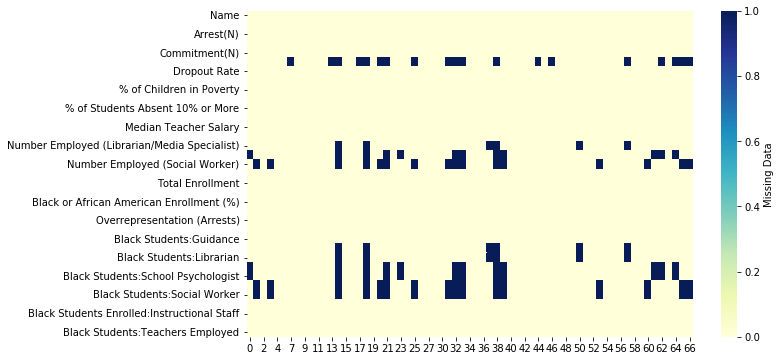

In [17]:
## Missing data
plt.figure(figsize=(10,6))
sns.heatmap(ac_data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

There are missing values for commitment data, which I don't need to be concerned about bc I won’t' be using that columns in my analysis nor is it one of my target columns.

The next groups of columns with missing data are all columns related to school psychologist, librarian, and social worker data. I'll keep this in mind moving forward.

## Exploration and Analysis

To begin, let's begin by analyzing the variables of interest, **the ratio of % black girls arrested to the % of black girls in the general population** and the **% of black girls arrested**.

**Target Variables**

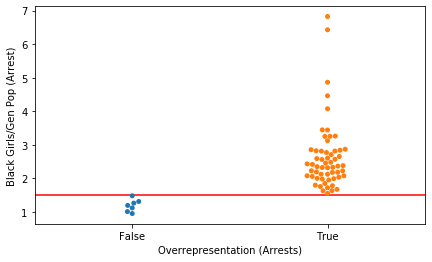

In [18]:
## Districts where Black Girls are proportionally overrepresnted in terms of Arrest 
plt.figure(figsize=(7,4))
sns.swarmplot(x=ac_data['Overrepresentation (Arrests)'], y = ac_data['Black Girls/Gen Pop (Arrest)'])

# Add line to indicate cut off
plt.axhline(y = 1.5, color = 'r', linestyle = '-')

In [19]:
over_calc = len(ac_data[ac_data['Overrepresentation (Arrests)']==True])/len(ac_data) * 100
f_over_calc = "{:.2f}".format(over_calc)
print("Black Girls are overrepresented in terms of arrest in",f_over_calc, "% counties in Florida")

Black Girls are overrepresented in terms of arrest in 89.23 % counties in Florida


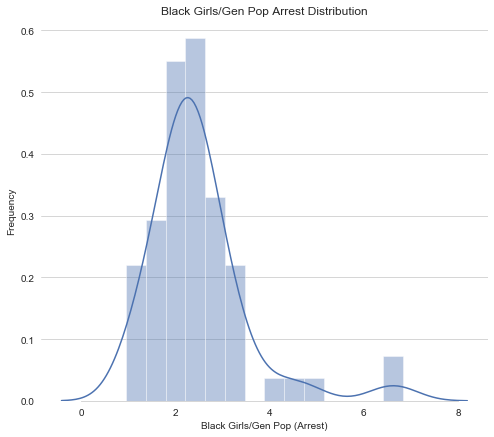

In [20]:
sns.set_style("whitegrid")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
# Check the distribution 
sns.distplot(ac_data['Black Girls/Gen Pop (Arrest)'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Black Girls/Gen Pop (Arrest)")
ax.set(title="Black Girls/Gen Pop Arrest Distribution")
sns.despine(trim=True, left=True)
plt.show()

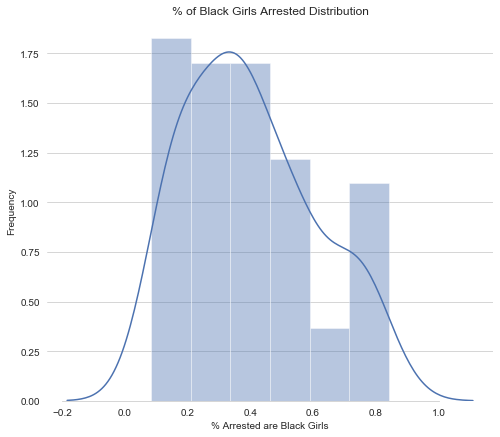

In [21]:
sns.set_style("whitegrid")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
# Check the distribution 
sns.distplot(ac_data['% Arrested are Black Girls'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel='% Arrested are Black Girls')
ax.set(title="% of Black Girls Arrested Distribution")
sns.despine(trim=True, left=True)
plt.show();

Unfortunately, black girls are overrepresented in terms of arrests in majority of counties in Florida. Moreover, as seen in both distribution graphs, there is a second "peak" in the right side of the curve meaning there are a number counties with high statistics for both target variables. Let's identify them in the outliar section.

**Correlationships**

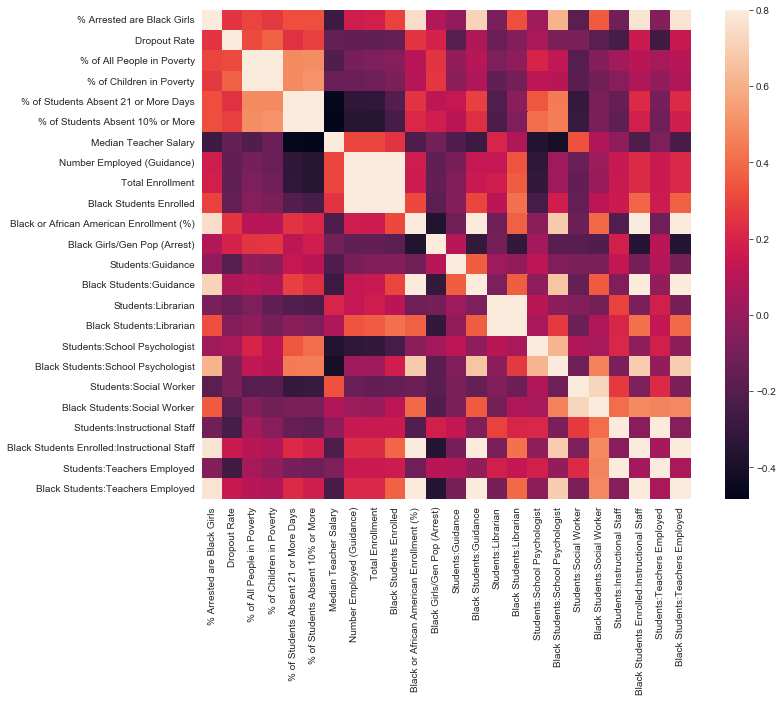

In [22]:
irrelevant_features = ['Name', 'Arrest(N)', 'Commitment(N)', 'Commitment(Black)', \
                         'Overrepresentation (Arrests)','% of Black girls in General Population', 
                      'Number of Teachers', 'Number Employed (Librarian/Media Specialist)', 'Number Employed (Social Worker)', 'Number Employed (School Psychologist)', \
                      'Number Employed (Instructional Staff)'] #'Black or African American Enrollment (%)',
X = ac_data.copy()
X.drop(columns = irrelevant_features, inplace = True)

## Correlation Matrix
corrmat = X.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax = 0.8, square=True);

Above is a heatmap of the correlations of all the socio-economic and school features I've collected or created. 

Some obvious relationships are highlighted such as the light beige boxes indicating that '% of All People in Poverty' is almost positively correlated with '% of Children in Poverty' The light orange boxes on the first row indicate that the proportion of black girls arrested have some strong positive correlations with a couple of the features. 

The visual above gives us an overview of the various relationships in our data but let's zoom into our target variables.

In [23]:
## Positive Correlations
k = 6 #number of variables for heatmap
pos_cols_ratio = corrmat.nlargest(k, 'Black Girls/Gen Pop (Arrest)')['Black Girls/Gen Pop (Arrest)'].index
# row with largest correlations
pos_corr = corrmat[pos_cols_ratio]
pos_corr.loc[['Black Girls/Gen Pop (Arrest)']]

,Black Girls/Gen Pop (Arrest),% of Children in Poverty,% of All People in Poverty,Dropout Rate,Students:Instructional Staff,% of Students Absent 10% or More
Black Girls/Gen Pop (Arrest),1.0,0.260875,0.256653,0.194918,0.182279,0.168715


In [24]:
## Positive Correlations
k = 6 #number of variables for heatmap
pos_cols_arrests = corrmat.nlargest(k, '% Arrested are Black Girls')['% Arrested are Black Girls'].index
# row with largest correlations
pos_corr = corrmat[pos_cols_arrests]
pos_corr.loc[['% Arrested are Black Girls']]

,% Arrested are Black Girls,Black Students Enrolled:Instructional Staff,Black Students:Teachers Employed,Black or African American Enrollment (%),Black Students:Guidance,Black Students:School Psychologist
% Arrested are Black Girls,1.0,0.771859,0.771476,0.754422,0.719295,0.614112


For Black Girls Arrested/Black in General Population, the % of children in poverty has the strongest positive correlation followed closely by % of everyone in poverty. Interestingly, factors related to not being in school such as dropout rates and absence have a positive, albeit a weak relationship with this ratio. This could suggest that even though many black girls get arrested at school, not attending school (either dropping out or being absent a lot) leads to worse outcomes.

For % of black girls arrested, the five strongest correlations are all black students to staff ratios. Black Students per instructional staff, black students per teacher, and black students per guidance counselor have especially strong positive relationships. These observations support the general idea that students tend to do better in academics when the student-to-teacher ratio is lower. In this case, a lower number of students to instructional staff and guidance counselors is also correlated with lower proportions of black girls arrested.

One thing to note is one major drawback of the data is that it is on a pretty high level. Even though a county could have a higher number of teachers employed compared relative to other counties with similar student populations, we can't be sure that the access to more teachers is equal across all socioeconomic and ethnic groups.

In [25]:
## Negative Correlations
k = 6 #number of variables for heatmap
neg_cols_ratio = corrmat.nsmallest(k, 'Black Girls/Gen Pop (Arrest)')['Black Girls/Gen Pop (Arrest)'].index
# row with largest correlations
neg_corr = corrmat[neg_cols_ratio]
neg_corr.loc[['Black Girls/Gen Pop (Arrest)']]

,Black or African American Enrollment (%),Black Students Enrolled:Instructional Staff,Black Students:Teachers Employed,Black Students:Librarian,Black Students:Guidance,Black Students:Social Worker
Black Girls/Gen Pop (Arrest),-0.366218,-0.354336,-0.353741,-0.310192,-0.305762,-0.216565


In [26]:
## Negative Correlations
k = 6 #number of variables for heatmap
neg_cols_arrests = corrmat.nsmallest(k, '% Arrested are Black Girls')['% Arrested are Black Girls'].index
# row with largest correlations
neg_corr = corrmat[neg_cols_arrests]
neg_corr.loc[['% Arrested are Black Girls']]

,Median Teacher Salary,Students:Social Worker,Students:Instructional Staff,Students:Librarian,Students:Teachers Employed,Students:Guidance
% Arrested are Black Girls,-0.279312,-0.178134,-0.110191,-0.085047,-0.052509,-0.016826


*Black or African American Enrollment (%)*

The first piece of information that stood out to me was that there is a moderately weak relationship between the ratio of black girls arrested to their presence in the population and % of Black Students enrolled. This concerning trend suggests that in counties where black students are even more of a minority, black girls tend to be even more represented in arrest statistics. 

*Student-Staff Ratios*

It looks like the data might be telling us some contradictory information regarding student-to-staff ratios. Let's try to unpack that.

Unlike % of Black Girls Arrested, the black student-to-staff ratios are negatively correlated with their overrepresentation. Another point worth noting is that these correlations here have a smaller absolute value than those observed for % of black girls arrested. Moreover, these two variables don't even appear to be correlated with one another (referring to the heatmap I would say they have a correlation of approx. 0.1), which is not what I was expecting. One possible explanation is that % of black girls in the general population is a stronger determinant to the ratio calculated. As population demographics is not something training or advocacy can influence, % of Black Girls Arrested might be a more worthwhile variable to track and study in order to fulfill DBWPC's mission. With this in mind, I would place more weight on the student-staff ratio correlations for % Black Girls arrested than that of the ratio of black girls arrested to their presence in the general population.

The negative correlation coefficients between the student-to-staff ratios and % of Black Girls arrested are so small there is arguably no relationship to try to discern. The only one worth nothing is that there is a negative, albeit weak, relationship between median teacher salary and black girls arrested. If we are assuming that most arrests occur at school, there is a possibility that underpaid and/or inexperienced teachers might be more ready to call the police when a student is disruptive. At the county level, this is difficult to confirm but it might be worth doing a more granular analysis.
____________________________________________________________________________________________________________________

As it has been found, there are cases in which counties have not reported staff data. Let's see if there are any observable trends in our target variables for these counties.


In [27]:
#Librarian Media Specialist
ac_data['Has Librarian Data'] = pd.Series(len(ac_data['Number Employed (Librarian/Media Specialist)']), index=ac_data.index)
ac_data['Has Librarian Data'] = 0 
ac_data.loc[ac_data['Number Employed (Librarian/Media Specialist)']>0,'Has Librarian Data'] = 1

#Social Worker
ac_data['Has Social Worker Data'] = pd.Series(len(ac_data['Number Employed (Social Worker)']), index=ac_data.index)
ac_data['Has Social Worker Data'] = 0 
ac_data.loc[ac_data['Number Employed (Social Worker)']>0,'Has Social Worker Data'] = 1

#School Pscyhologist
ac_data['Has School Pscyhologist Data'] = pd.Series(len(ac_data['Number Employed (School Psychologist)']), index=ac_data.index)
ac_data['Has School Pscyhologist Data'] = 0 
ac_data.loc[ac_data['Number Employed (School Psychologist)']>0,'Has School Pscyhologist Data'] = 1

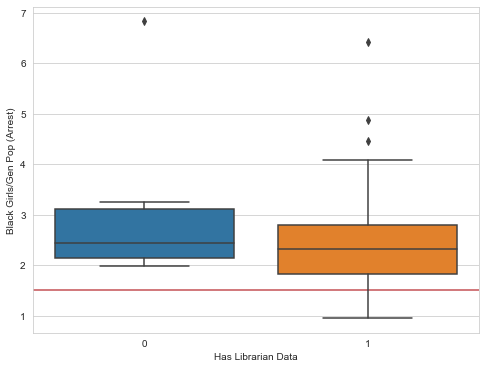

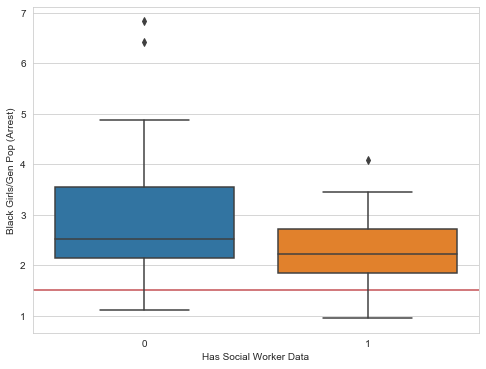

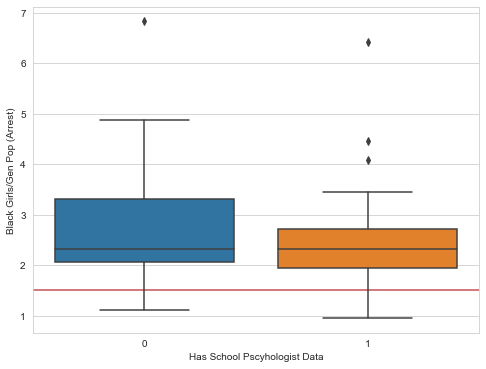

In [28]:
has_fe = ['Has Librarian Data','Has Social Worker Data','Has School Pscyhologist Data']

for fe in has_fe:
    data = pd.concat([ac_data['Black Girls/Gen Pop (Arrest)'], ac_data[fe]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    # Add line to indicate cut off
    plt.axhline(y = 1.5, color = 'r', linestyle = '-')
    fig = sns.boxplot(x=fe, y='Black Girls/Gen Pop (Arrest)', data=data);



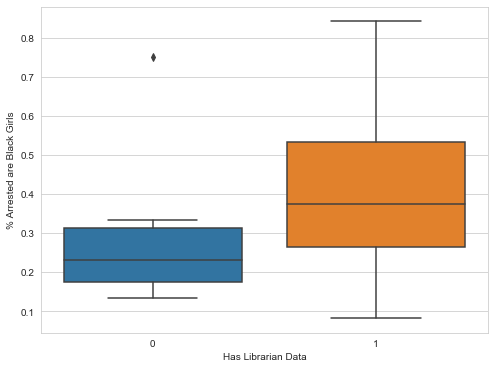

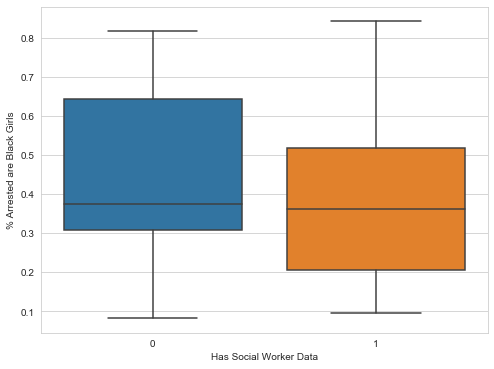

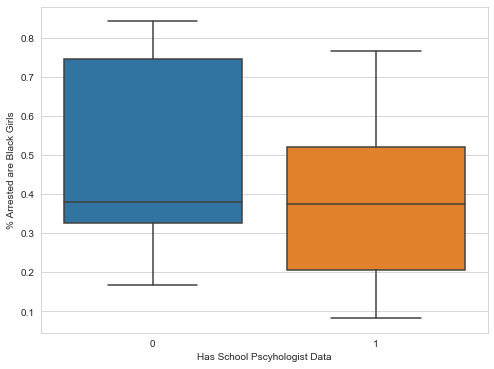

In [29]:
#has_fe = ['Has Librarian Data','Has Social Worker Data','Has School Pscyhologist Data']

for fe in has_fe:
    data = pd.concat([ac_data['% Arrested are Black Girls'], ac_data[fe]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))

    fig = sns.boxplot(x=fe, y='% Arrested are Black Girls', data=data);


The distribution of the target variables for the counties with missing data are generally pretty scattered. Consequently, I don't think we need to worry that counties that did not report certain staff data were "hiding" anything.

____________________________________________________________________________________________________________________

Given the interest in the correlation between black students to staff ratio to our target variables, scatterplots indicating the visual relationship between the two will be generated.

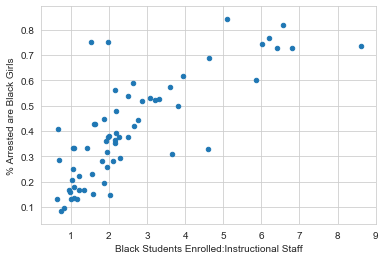

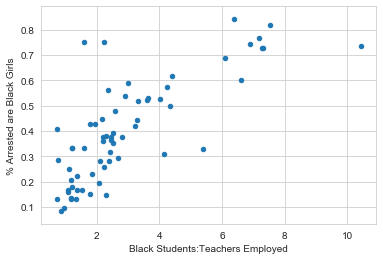

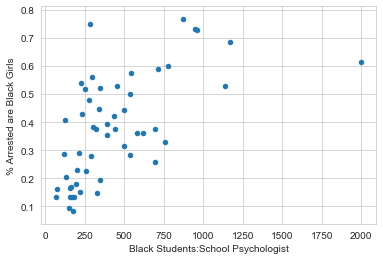

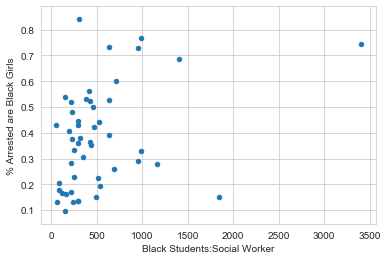

In [30]:
#scatterplot

sch_f = ['Black Students Enrolled:Instructional Staff', 'Black Students:Teachers Employed', \
                   'Black Students:School Psychologist', 'Black Students:Social Worker']

for f in sch_f:
    data = pd.concat([ac_data['% Arrested are Black Girls'], ac_data[f]], axis=1)
    data.plot.scatter(x=f, y='% Arrested are Black Girls');

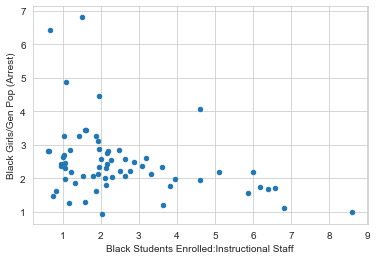

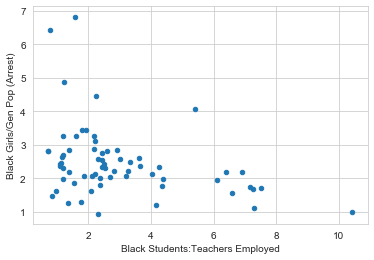

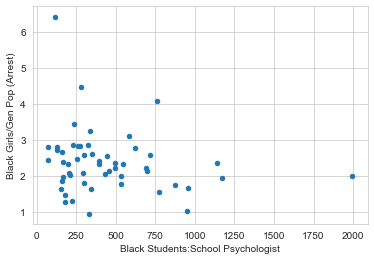

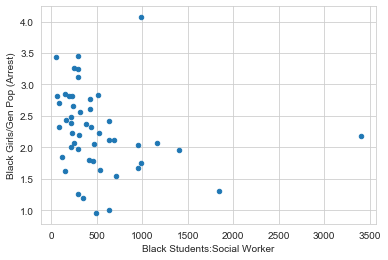

In [31]:
#scatterplot

sch_f = ['Black Students Enrolled:Instructional Staff', 'Black Students:Teachers Employed', \
                   'Black Students:School Psychologist', 'Black Students:Social Worker']

for f in sch_f:
    data = pd.concat([ac_data['Black Girls/Gen Pop (Arrest)'], ac_data[f]], axis=1)
    data.plot.scatter(x=f, y='Black Girls/Gen Pop (Arrest)');
    



## Outliers?

From the distribution graphs seen earlier, there are no outliers on the left side of the curve so the outlier analysis will be focused on identifying which counties are currently arresting the highest proportion of black girls. 

In statistics, the standard cut-off value for finding outliers is Z-scores of +/-3 or further from zero. However, given the mission of the DBWPC and the fact that an already unacceptable proportion of black girls are arrested and are overrepresented in an overwhelming number of counties, my cut-off value will be 2.


In [32]:
## Use Z-score approach to detect any outliars

ac_data['Overrep Z'] = stats.zscore(ac_data['Black Girls/Gen Pop (Arrest)'])
ac_data['Arrest Z'] = stats.zscore(ac_data['% Arrested are Black Girls'])

In [33]:
ac_data[ac_data['Overrep Z'] > 2]

,Name,% of Black girls in General Population,Arrest(N),% Arrested are Black Girls,Commitment(N),Commitment(Black),Dropout Rate,% of All People in Poverty,% of Children in Poverty,% of Students Absent 21 or More Days,...,Black Students:Social Worker,Students:Instructional Staff,Black Students Enrolled:Instructional Staff,Students:Teachers Employed,Black Students:Teachers Employed,Has Librarian Data,Has Social Worker Data,Has School Pscyhologist Data,Overrep Z,Arrest Z
18,Franklin,0.109915,4.0,0.750000,0.0,NaN,0.141,19.7,31.2,0.161629,...,NaN,14.450549,1.516484,15.114943,1.586207,0,0,0,4.151291,1.717861
20,Gilchrist,0.044460,7.0,0.285714,0.0,NaN,0.053,19.3,25.7,0.086093,...,NaN,16.005814,0.680233,18.111842,0.769737,1,0,1,3.772077,-0.557551
33,Lafayette,0.068515,3.0,0.333333,0.0,NaN,0.012,10.9,18.4,0.156061,...,NaN,15.350000,1.087500,17.295775,1.225352,1,0,0,2.281429,-0.324175


In [34]:
ac_data[ac_data['Arrest Z'] > 2]

,Name,% of Black girls in General Population,Arrest(N),% Arrested are Black Girls,Commitment(N),Commitment(Black),Dropout Rate,% of All People in Poverty,% of Children in Poverty,% of Students Absent 21 or More Days,...,Black Students:Social Worker,Students:Instructional Staff,Black Students Enrolled:Instructional Staff,Students:Teachers Employed,Black Students:Teachers Employed,Has Librarian Data,Has Social Worker Data,Has School Pscyhologist Data,Overrep Z,Arrest Z
23,Hamilton,0.384094,19.0,0.842105,1.0,1.0,0.093,22.1,28.3,0.25000,...,306.5,13.425000,5.108333,16.781250,6.385417,1,1,0,-0.270444,2.169259
39,Madison,0.475316,11.0,0.818182,1.0,0.0,0.042,11.3,19.4,0.11442,...,NaN,13.846561,6.571429,15.860606,7.527273,1,0,0,-0.720261,2.052013


In [35]:
## Identify counties with lower % of Black Students enrolled and higher % fo black girls arrested
ac_data['% Black Students Enrolled Z'] = stats.zscore(ac_data['Black or African American Enrollment (%)'])
ac_data[(ac_data['% Black Students Enrolled Z'] < 0) & (ac_data['Overrep Z'] > 2)]


,Name,% of Black girls in General Population,Arrest(N),% Arrested are Black Girls,Commitment(N),Commitment(Black),Dropout Rate,% of All People in Poverty,% of Children in Poverty,% of Students Absent 21 or More Days,...,Students:Instructional Staff,Black Students Enrolled:Instructional Staff,Students:Teachers Employed,Black Students:Teachers Employed,Has Librarian Data,Has Social Worker Data,Has School Pscyhologist Data,Overrep Z,Arrest Z,% Black Students Enrolled Z
18,Franklin,0.109915,4.0,0.750000,0.0,NaN,0.141,19.7,31.2,0.161629,...,14.450549,1.516484,15.114943,1.586207,0,0,0,4.151291,1.717861,-0.586642
20,Gilchrist,0.044460,7.0,0.285714,0.0,NaN,0.053,19.3,25.7,0.086093,...,16.005814,0.680233,18.111842,0.769737,1,0,1,3.772077,-0.557551,-1.044230
33,Lafayette,0.068515,3.0,0.333333,0.0,NaN,0.012,10.9,18.4,0.156061,...,15.350000,1.087500,17.295775,1.225352,1,0,0,2.281429,-0.324175,-0.836497


## Summary

* Black girls are overrepresented in terms of arrest in ~90% of all counties in Florida.
* While this is an alarming number, it has no correlation with the proportion of black girls arrested. Thus, the factor that most influences this ratio is arguably the % of Black Girls in the general population. This is something that can't be influenced by training, advocacy, or policy so % of Black Girls arrested might be a better target for the DBWPC to keep track of.
* The moderately weak relationship (correlation coefficient ~-0.4) between the ratio between the ratio of black girls arrested to their presence in the population and % of Black Students enrolled, suggests that in counties where black students are even more of a minority, black girls tend to be even more represented in the arrest statistic ratio. The black girls in these counties (Franklin, Gilchrist, and Lafayette) may benefit from more advocacy by the DBWPC on their behalf.

* The academic setting factors that appear to be correlated with % of Black Girls arrested are black students-to-instructional staff, black students-to-teachers employed, and black students-guidance counselors. One could hypothesis that the more support is available to black students from these groups, the less likely they are to get arrested.
* Black students-to-school psychologist and % of Black Girls arrest has a correlations coefficient of ~0.6, which arguably means that addressing mental health leads to fewer black girls being arrested.
* The counties with the highest proportion of black girls arrested are Hamilton and Madison; they might be a worthwhile place for the DBWPC should focus their efforts next.

Again, I want to note that a weakness of this EDA was that it was conducted on the county-level. That is to say even though a county had a higher number of certain staff employed relative to other counties with similar student populations, we don't know if the access to this staff is equal across all socioeconomic and ethnic groups. 